In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,precision_score,f1_score,roc_auc_score,roc_curve
from sklearn.metrics import recall_score,classification_report,accuracy_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Using logistic regression.

In [35]:
df=pd.read_csv(r'C:\Users\User\Downloads\framingham.csv')

In [36]:
df.drop('education',axis=1,inplace=True)

In [37]:
df.isnull().sum()

male                  0
age                   0
currentSmoker         0
cigsPerDay           29
BPMeds               53
prevalentStroke       0
prevalentHyp          0
diabetes              0
totChol              50
sysBP                 0
diaBP                 0
BMI                  19
heartRate             1
glucose             388
future condition      0
dtype: int64

In [38]:
df['cigsPerDay'].fillna(df['cigsPerDay'].median(),inplace=True)
df['BPMeds'].fillna(df['BPMeds'].median(),inplace=True)
df['totChol'].fillna(df['totChol'].median(),inplace=True)
df['BMI'].fillna(df['BMI'].median(),inplace=True)
df['heartRate'].fillna(df['heartRate'].median(),inplace=True)
df['glucose'].fillna(df['glucose'].median(),inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   male              4238 non-null   int64  
 1   age               4238 non-null   int64  
 2   currentSmoker     4238 non-null   int64  
 3   cigsPerDay        4238 non-null   float64
 4   BPMeds            4238 non-null   float64
 5   prevalentStroke   4238 non-null   int64  
 6   prevalentHyp      4238 non-null   int64  
 7   diabetes          4238 non-null   int64  
 8   totChol           4238 non-null   float64
 9   sysBP             4238 non-null   float64
 10  diaBP             4238 non-null   float64
 11  BMI               4238 non-null   float64
 12  heartRate         4238 non-null   float64
 13  glucose           4238 non-null   float64
 14  future condition  4238 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 496.7 KB


In [40]:
df

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,future condition
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,78.0,0


In [41]:
x=df.drop('future condition',axis=1)
y=df[['future condition']]

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [70]:
logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train)

LogisticRegression()

In [44]:
y_pred=logistic_model.predict(x_test)
y_pred_train = logistic_model.predict(x_train)
y_pred[-5:]

array([0, 0, 0, 0, 0], dtype=int64)

In [45]:
y_test.tail()

,future condition
245,0
4215,0
548,0
4225,0
2996,0


In [46]:
confusion_matrix(y_train,y_pred_train)

array([[2869,   15],
       [ 485,   21]], dtype=int64)

In [47]:
confusion_matrix(y_test,y_pred)

array([[708,   2],
       [133,   5]], dtype=int64)

In [48]:
cls_report = classification_report(y_test,y_pred)
print(cls_report)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       710
           1       0.71      0.04      0.07       138

    accuracy                           0.84       848
   macro avg       0.78      0.52      0.49       848
weighted avg       0.82      0.84      0.78       848



In [49]:
acc_score = accuracy_score(y_test,y_pred)
acc_score

0.8408018867924528

In [50]:
acc_score_train = accuracy_score(y_train,y_pred_train)
acc_score_train

0.8525073746312685

# Using KNN.

In [51]:
df.isnull().sum()

male                0
age                 0
currentSmoker       0
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose             0
future condition    0
dtype: int64

In [52]:
x=df.drop('future condition',axis=1)
y=df[['future condition']]

# Using Normalization

In [63]:
normal_scaler=MinMaxScaler()
x_scaled=normal_scaler.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)
y_pred=knn_model.predict(x_test)
y_pred_train=knn_model.predict(x_train)

In [56]:
cls_report=classification_report(y_test,y_pred)
print(cls_report)

              precision    recall  f1-score   support

           0       0.87      0.97      0.91       733
           1       0.20      0.05      0.08       115

    accuracy                           0.84       848
   macro avg       0.53      0.51      0.50       848
weighted avg       0.78      0.84      0.80       848



In [57]:
cls_report_train=classification_report(y_train,y_pred_train)
print(cls_report_train)

              precision    recall  f1-score   support

           0       0.87      0.98      0.93      2861
           1       0.72      0.24      0.36       529

    accuracy                           0.87      3390
   macro avg       0.80      0.61      0.64      3390
weighted avg       0.85      0.87      0.84      3390



In [58]:
confusion_matrix(y_test,y_pred)

array([[709,  24],
       [109,   6]], dtype=int64)

In [59]:
confusion_matrix(y_train,y_pred_train)

array([[2812,   49],
       [ 404,  125]], dtype=int64)

In [61]:
accuracy_score(y_test,y_pred)

0.8431603773584906

In [62]:
accuracy_score(y_train,y_pred_train)

0.8663716814159292

In [75]:
#hyper parameter tuning.
n_neighbors=list(range(1,31))
p=[1,2]
hyperparameters=dict(n_neighbors=n_neighbors,p=p)
knn_new=KNeighborsClassifier()
rscv=RandomizedSearchCV(knn_new,hyperparameters,cv=5)
knn_model=rscv.fit(x_train,y_train)
knn_model.best_estimator_

KNeighborsClassifier(n_neighbors=26, p=1)

In [76]:
y_pred_best=knn_model.predict(x_test)
accuracy_score(y_test,y_pred_best)

0.8643867924528302

In [79]:
y_pred_prob = knn_model.predict_proba(x_test)
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob[:,1])

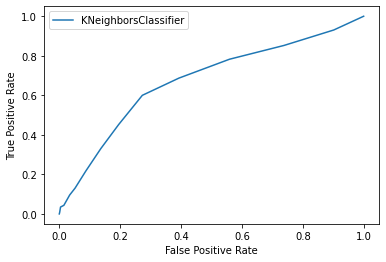

In [80]:
plt.plot(fpr,tpr,label = 'KNeighborsClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'best')

# Using Standardization.

In [83]:
std_scaler=StandardScaler()
x_scaled=normal_scaler.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)
y_pred=knn_model.predict(x_test)
y_pred_train=knn_model.predict(x_train)

In [85]:
cls_report=classification_report(y_test,y_pred)
print(cls_report)

              precision    recall  f1-score   support

           0       0.87      0.97      0.91       733
           1       0.20      0.05      0.08       115

    accuracy                           0.84       848
   macro avg       0.53      0.51      0.50       848
weighted avg       0.78      0.84      0.80       848



In [86]:
cls_report_train=classification_report(y_train,y_pred_train)
print(cls_report_train)

              precision    recall  f1-score   support

           0       0.87      0.98      0.93      2861
           1       0.72      0.24      0.36       529

    accuracy                           0.87      3390
   macro avg       0.80      0.61      0.64      3390
weighted avg       0.85      0.87      0.84      3390



In [87]:
confusion_matrix(y_test,y_pred)

array([[709,  24],
       [109,   6]], dtype=int64)

In [88]:
confusion_matrix(y_train,y_pred_train)

array([[2812,   49],
       [ 404,  125]], dtype=int64)

In [89]:
accuracy_score(y_test,y_pred)

0.8431603773584906

In [90]:
accuracy_score(y_train,y_pred_train)

0.8663716814159292

In [91]:
#hyper parameter tuning.
n_neighbors=list(range(1,31))
p=[1,2]
hyperparameters=dict(n_neighbors=n_neighbors,p=p)
knn_new=KNeighborsClassifier()
rscv=RandomizedSearchCV(knn_new,hyperparameters,cv=5)
knn_model=rscv.fit(x_train,y_train)
knn_model.best_estimator_

KNeighborsClassifier(n_neighbors=20, p=1)

In [92]:
y_pred_best=knn_model.predict(x_test)
accuracy_score(y_test,y_pred_best)

0.8643867924528302

In [93]:
y_pred_prob = knn_model.predict_proba(x_test)
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob[:,1])

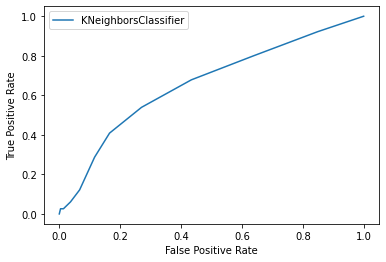

In [94]:
plt.plot(fpr,tpr,label = 'KNeighborsClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'best')